#Student Performance Analysis

In [691]:
from google.colab import drive
drive.mount("gdrive")

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


## Import the necessary libraries

In [692]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ML Libraries and utils
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf

## Read the datasets.

In [693]:
df_mat = pd.read_csv("/content/gdrive/My Drive/DataAnalysis/StudentPerformance/student-mat.csv",delimiter=";")
df_por = pd.read_csv("/content/gdrive/My Drive/DataAnalysis/StudentPerformance/student-por.csv",delimiter=";")

In [694]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [695]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## Metadata regarding on both datasets.

In [696]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [697]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [698]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [699]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [700]:
def unique_categories(df):
  for col in df.columns:
    if(df[col].dtype=="object"):
      print(col,":",df[col].unique())

### Categorical Variables

In [701]:
print("DF MAT:")
unique_categories(df_mat)
print("\nDF POR:")
unique_categories(df_por)

DF MAT:
school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']

DF POR:
school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


## EDA

### School

'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira


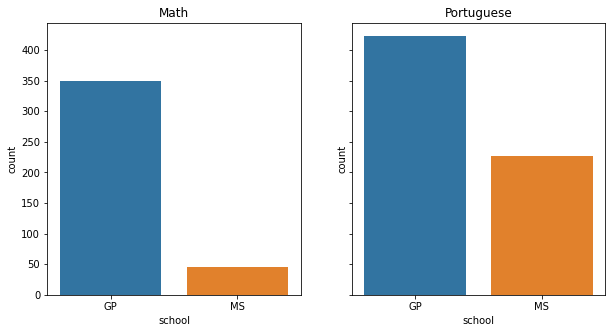

In [702]:
print("'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
ax1.set_title("Math")
sns.countplot(df_mat.school,data=df_mat,ax=ax1)
ax2.set_title("Portuguese")
sns.countplot(df_por.school,data=df_por,ax=ax2)
f.show()

### Sex

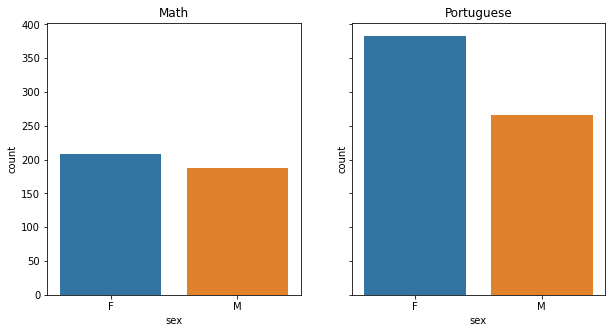

In [703]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
ax1.set_title("Math")
sns.countplot(df_mat.sex,data=df_mat,ax=ax1)
ax2.set_title("Portuguese")
sns.countplot(df_por.sex,data=df_por,ax=ax2)
f.show()

### Address

 'U' - urban or 'R' - rural


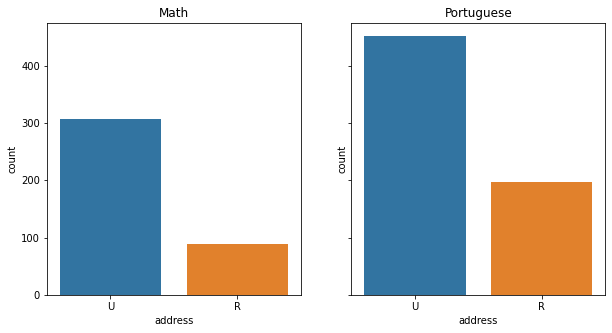

In [704]:
print(" 'U' - urban or 'R' - rural")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
ax1.set_title("Math")
sns.countplot(df_mat.address,data=df_mat,ax=ax1)
ax2.set_title("Portuguese")
sns.countplot(df_por.address,data=df_por,ax=ax2)
f.show()

### Family size

'LE3' - less or equal to 3 or 'GT3' - greater than 3


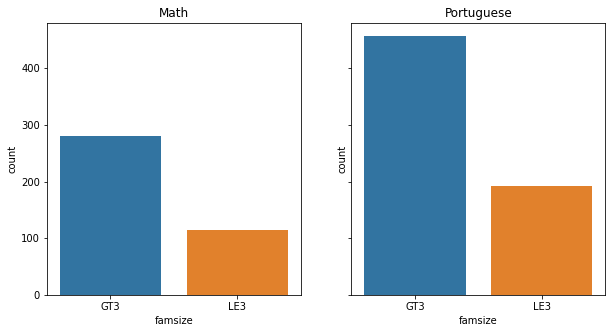

In [705]:
print("'LE3' - less or equal to 3 or 'GT3' - greater than 3")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
ax1.set_title("Math")
sns.countplot(df_mat.famsize,data=df_mat,ax=ax1)
ax2.set_title("Portuguese")
sns.countplot(df_por.famsize,data=df_por,ax=ax2)
f.show()

### Parents maritial status

'T' - living together or 'A' - apart


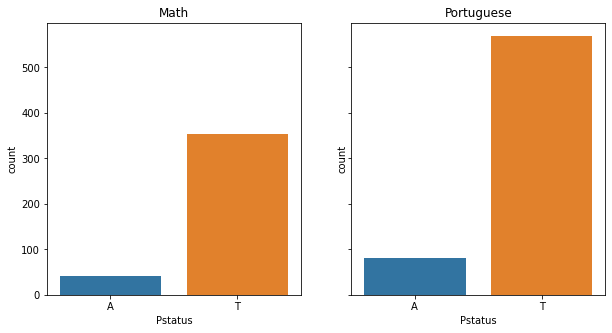

In [706]:
print("'T' - living together or 'A' - apart")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))
ax1.set_title("Math")
sns.countplot(df_mat.Pstatus,data=df_mat,ax=ax1)
ax2.set_title("Portuguese")
sns.countplot(df_por.Pstatus,data=df_por,ax=ax2)
f.show()

### Father,Mother job ,reason to choose this school, student's guardian

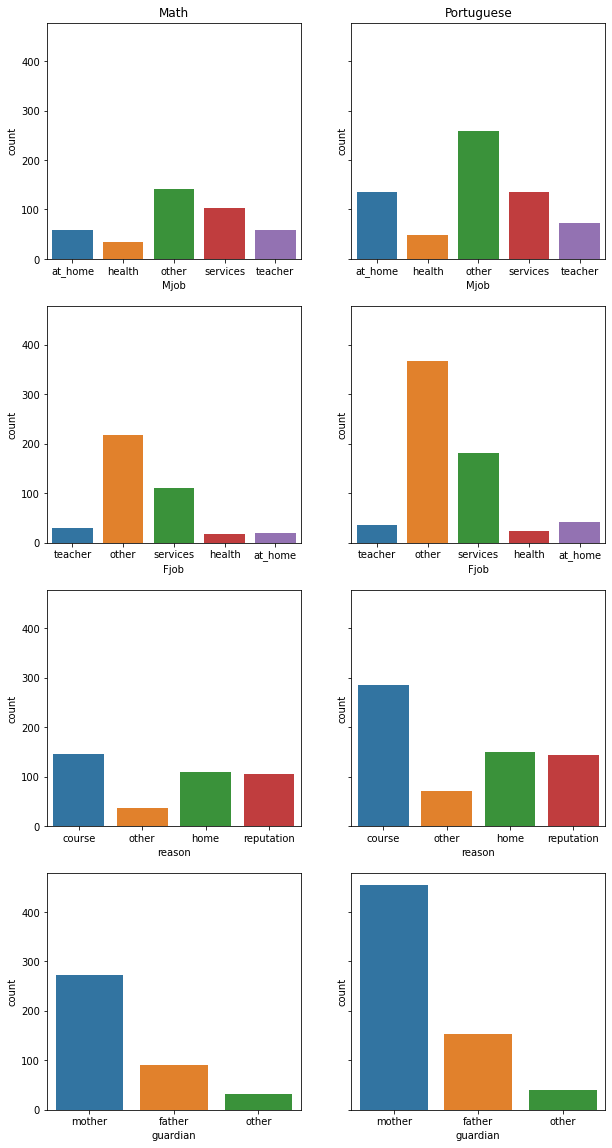

In [707]:
f, ([ax1, ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]) = plt.subplots(4, 2, sharey=True,figsize=(10,20))
ax1.set_title("Math")
sns.countplot(df_mat.Mjob,data=df_mat,ax=ax1)
ax2.set_title("Portuguese")
sns.countplot(df_por.Mjob,data=df_por,ax=ax2)
sns.countplot(df_mat.Fjob,data=df_mat,ax=ax3)
sns.countplot(df_por.Fjob,data=df_por,ax=ax4)
sns.countplot(df_mat.reason,data=df_mat,ax=ax5)
sns.countplot(df_por.reason,data=df_por,ax=ax6)
sns.countplot(df_mat.guardian,data=df_mat,ax=ax7)
sns.countplot(df_por.guardian,data=df_por,ax=ax8)
f.show()

### Extra educational support (schoolsup),family educational support (famsup),extra paid classes within the course subject (paid),extra-curricular activities (activities)

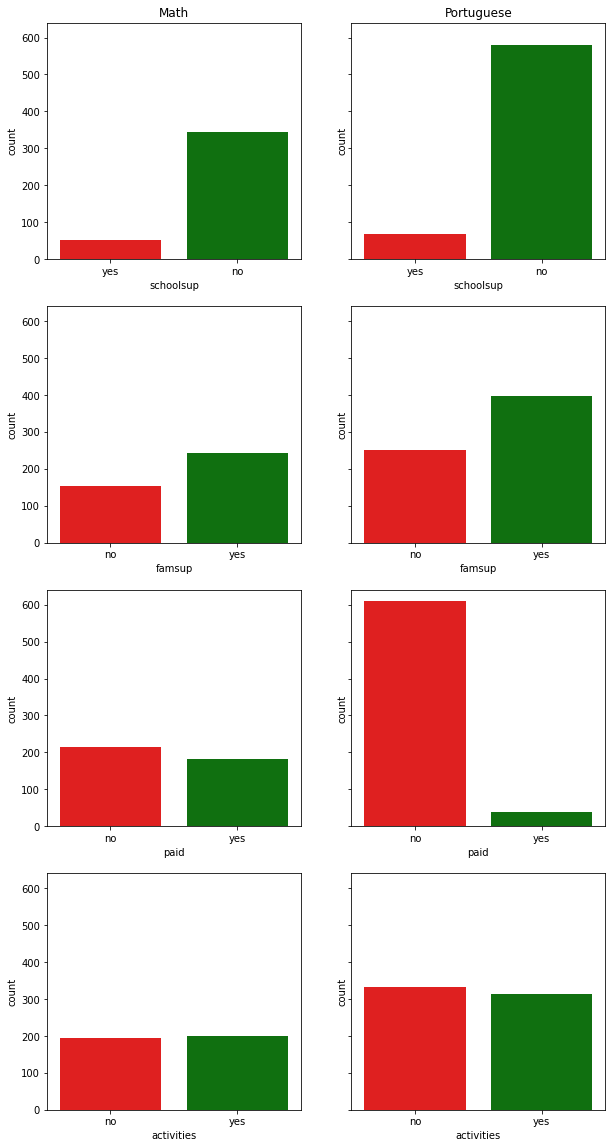

In [708]:
f, ([ax1, ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]) = plt.subplots(4, 2, sharey=True,figsize=(10,20))
ax1.set_title("Math")
sns.countplot(df_mat.schoolsup,data=df_mat,ax=ax1,palette=["r","g"])
ax2.set_title("Portuguese")
sns.countplot(df_por.schoolsup,data=df_por,ax=ax2,palette=["r","g"])
sns.countplot(df_mat.famsup,data=df_mat,ax=ax3,palette=["r","g"])
sns.countplot(df_por.famsup,data=df_por,ax=ax4,palette=["r","g"])
sns.countplot(df_mat.paid,data=df_mat,ax=ax5,palette=["r","g"])
sns.countplot(df_por.paid,data=df_por,ax=ax6,palette=["r","g"])
sns.countplot(df_mat.activities,data=df_mat,ax=ax7,palette=["r","g"])
sns.countplot(df_por.activities,data=df_por,ax=ax8,palette=["r","g"])
f.show()

### Attended nursery school (nursery),wants to take higher education (higher),Internet access at home (internet),with a romantic relationship (romantic)

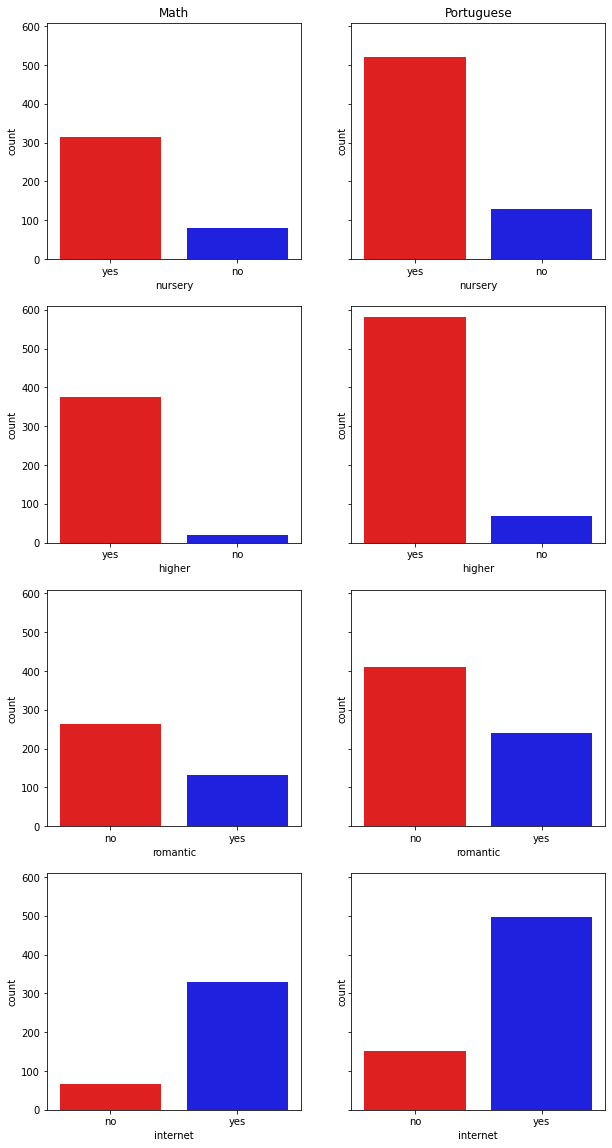

In [709]:
f, ([ax1, ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]) = plt.subplots(4, 2, sharey=True,figsize=(10,20))
ax1.set_title("Math")
sns.countplot(df_mat.nursery,data=df_mat,ax=ax1,palette=["r","b"])
ax2.set_title("Portuguese")
sns.countplot(df_por.nursery,data=df_por,ax=ax2,palette=["r","b"])
sns.countplot(df_mat.higher,data=df_mat,ax=ax3,palette=["r","b"])
sns.countplot(df_por.higher,data=df_por,ax=ax4,palette=["r","b"])
sns.countplot(df_mat.romantic,data=df_mat,ax=ax5,palette=["r","b"])
sns.countplot(df_por.romantic,data=df_por,ax=ax6,palette=["r","b"])
sns.countplot(df_mat.internet,data=df_mat,ax=ax7,palette=["r","b"])
sns.countplot(df_por.internet,data=df_por,ax=ax8,palette=["r","b"])
f.show()

### Correlation Matrix

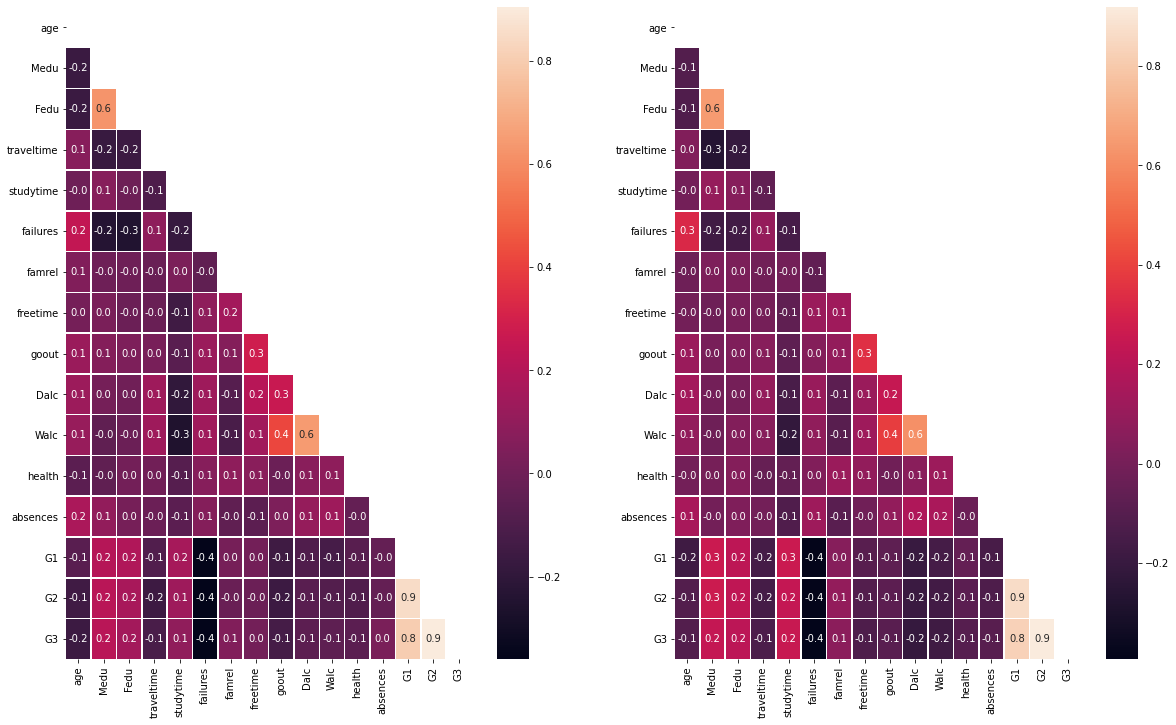

In [710]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,12))         # Sample figsize in inches
sns.heatmap(df_mat.corr(), annot=True, linewidths=.5,ax=ax1, fmt= '.1f',mask= np.triu(np.ones_like(df_mat.corr(), dtype=np.bool)))
sns.heatmap(df_por.corr(), annot=True, linewidths=.5,ax=ax2, fmt= '.1f',mask= np.triu(np.ones_like(df_por.corr(), dtype=np.bool)))

### Pairplot for continious variables

In [711]:
#g=sns.pairplot(df_mat.drop(columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']))
#g.fig.set_size_inches(50,50)

## Data Preprocessing

In [738]:
features_mat = df_mat.drop(columns=["G1","G2","G3"])
target_mat = df_mat.G3

features_por = df_por.drop(columns=["G1","G2","G3"])
target_por = df_por.G3

In [885]:
features_mat = df_mat.drop(columns=["G1","G2","G3"],axis=1)
target_mat = df_mat.G3

features_por = df_por.drop(columns=["G1","G2","G3"])
target_por = df_por.G3

features_mat=features_mat.append(features_por,ignore_index=True)
target_mat=target_mat.append(target_por,ignore_index=True)

In [886]:
len(features_mat)

1044

In [887]:
d = {range(0, 10): 0,range(10, 20): 1}

target_mat = target_mat.apply(lambda x: next((v for k, v in d.items() if x in k), 0))

In [888]:
features_mat = pd.get_dummies(features_mat)

In [889]:
standard = MinMaxScaler()
features_mat_ = pd.DataFrame(standard.fit_transform(features_mat.select_dtypes("int64")),columns=features_mat.select_dtypes("int64").columns)
for col in features_mat_.columns:
  features_mat[col] = features_mat_[col]

In [890]:
X_train,X_test,y_train,y_test = train_test_split(features_mat,target_mat,test_size=0.33,random_state=42)

In [891]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
935,0.285714,0.75,0.5,0.333333,0.000000,0.000000,0.75,0.50,0.50,0.25,0.25,0.00,0.066667,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1
424,0.142857,1.00,1.0,0.000000,0.333333,0.000000,0.75,0.75,1.00,1.00,1.00,1.00,0.053333,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
529,0.285714,0.50,0.5,0.000000,0.000000,0.000000,0.50,0.75,0.75,0.00,0.50,1.00,0.026667,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1
595,0.142857,0.25,0.5,0.000000,0.000000,0.000000,0.50,0.50,0.50,0.00,0.25,0.50,0.000000,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
390,0.714286,0.50,0.5,0.000000,0.333333,0.666667,1.00,1.00,0.75,0.75,1.00,0.75,0.146667,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [892]:
y_train.astype("category")

935    1
424    1
529    1
595    1
390    0
      ..
87     1
330    0
466    1
121    1
860    0
Name: G3, Length: 699, dtype: category
Categories (2, int64): [0, 1]

In [893]:
y_test.value_counts()

1    256
0     89
Name: G3, dtype: int64

## Model Selection

In [894]:
print(X_train.shape)
model  = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(56,)))
model.add(tf.keras.layers.Dense(28,activation="swish"))
model.add(tf.keras.layers.Dense(7,activation="swish"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

(699, 56)
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_47 (Flatten)         (None, 56)                0         
_________________________________________________________________
dense_188 (Dense)            (None, 28)                1596      
_________________________________________________________________
dense_189 (Dense)            (None, 7)                 203       
_________________________________________________________________
dense_190 (Dense)            (None, 2)                 16        
Total params: 1,815
Trainable params: 1,815
Non-trainable params: 0
_________________________________________________________________


In [895]:
y_train=tf.keras.utils.to_categorical(y_train,2)
history = model.fit(X_train,y_train,epochs=30)

Epoch 1/30
22/22 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6266
Epoch 2/30
22/22 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.7969
Epoch 3/30
22/22 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7969
Epoch 4/30
22/22 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7969
Epoch 5/30
22/22 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7969
Epoch 6/30
22/22 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7969
Epoch 7/30
22/22 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.7969
Epoch 8/30
22/22 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7954
Epoch 9/30
22/22 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8011
Epoch 10/30
22/22 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8097
Epoch 11/30
22/22 [

In [896]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44        89
           1       0.80      0.95      0.87       256

    accuracy                           0.79       345
   macro avg       0.74      0.64      0.65       345
weighted avg       0.77      0.79      0.76       345



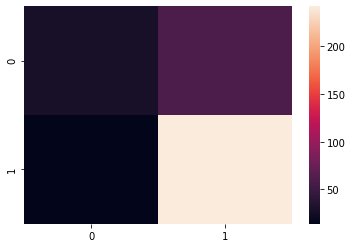

In [897]:
from sklearn.metrics import confusion_matrix

con = confusion_matrix(y_test,model.predict_classes(X_test))
sns.heatmap(con)